In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [3]:
# Step 1: Load and clean data
df = pd.read_csv('congressEW.csv')
df.columns = df.columns.str.strip()  # Remove trailing spaces from headers
df.replace('?', np.nan, inplace=True)
df_clean = df.dropna()

In [5]:
# Step 2: Label encode features
label_encoders = {}
df_encoded = pd.DataFrame()

In [7]:
for column in df_clean.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_clean[column])
    label_encoders[column] = le

In [9]:
# Step 3: Prepare feature matrix (X) and true labels (y)
X = df_encoded.drop(columns=['class name']).to_numpy()
y_true = df_encoded['class name'].to_numpy()


In [13]:
# Step 4: Manual KMeans for k=2 with per-iteration cluster count
def run_kmeans_verbose(X, k=2, max_iters=100, tol=1e-4):
    np.random.seed(42)
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for iteration in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        unique, counts = np.unique(labels, return_counts=True)
        print(f"Iteration {iteration + 1}: ", end="")
        for i in range(k):
            count = counts[unique.tolist().index(i)] if i in unique else 0
            print(f"Cluster {i}: {count}  ", end="")
        print()

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            print("\nConverged.")
            break
        centroids = new_centroids

    return labels, centroids
    labels, centroids = run_kmeans_verbose(X, k=2)


In [15]:
labels, centroids = run_kmeans_verbose(X, k=2)

#add code that check dataset is equal are not with predicted result in yes or no one line 
print("Are the predicted labels equal to the original class labels?", np.array_equal(df_encoded['class name'].to_numpy(), labels))


Iteration 1: Cluster 0: 79  Cluster 1: 153  
Iteration 2: Cluster 0: 103  Cluster 1: 129  
Iteration 3: Cluster 0: 107  Cluster 1: 125  
Iteration 4: Cluster 0: 108  Cluster 1: 124  
Iteration 5: Cluster 0: 109  Cluster 1: 123  
Iteration 6: Cluster 0: 109  Cluster 1: 123  

Converged.
Are the predicted labels equal to the original class labels? False


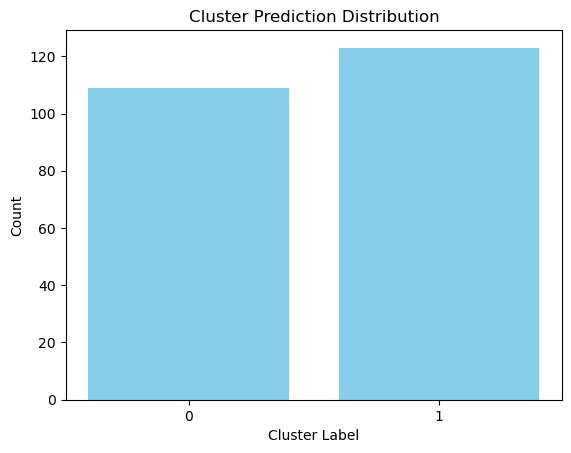

In [17]:
# Count the occurrences of each predicted label
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Plotting the bar chart
plt.bar(unique_labels, label_counts, color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Cluster Prediction Distribution')
plt.xticks(unique_labels)
plt.show()